In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from scipy.stats import linregress
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib notebook

In [2]:
# Read CSV
cases_data = pd.read_csv('covid19cases_test.csv')
vaccine_data= pd.read_csv('covid19vaccinesbycounty.csv')


In [108]:
Ca_counties_vax_demo_csv = "covid19vaccinesbycountybydemographic.csv"

ca_counties_vaxdemo_df = pd.read_csv(Ca_counties_vax_demo_csv, encoding="utf-8")
ca_counties_vaxdemo_df['administered_date']=pd.to_datetime(ca_counties_vaxdemo_df['administered_date'])
ca_counties_vaxdemo_df.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-26,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-25,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-24,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-23,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-22,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False


In [109]:
ca_counties_vaxdemo_df = ca_counties_vaxdemo_df.sort_values(["county", "administered_date"], ascending = (True, True))
ca_counties_vaxdemo_df.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
132,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,367870.0,40855.0,False
265,Alameda,MIXED,Age Group,18-49,709483.0,709483.0,2020-12-15,28.0,28.0,0.0,0.0,28.0,28.0,709455.0,709455.0,False
398,Alameda,MIXED,Age Group,50-64,315856.0,315856.0,2020-12-15,6.0,6.0,0.0,0.0,6.0,6.0,315850.0,315850.0,False
531,Alameda,MIXED,Age Group,65+,285108.0,285108.0,2020-12-15,2.0,2.0,0.0,0.0,2.0,2.0,285106.0,285106.0,False
664,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,4920.0,3962.0,False


In [110]:
##Input California County Name
county2 = input("Enter a California County Name? ")

Enter a California County Name? Yuba


Question 2: How does vaccination affect the case/death rate? us_covid_df will give us the baseline for our comparison, we need data to show improvement 


In [54]:
county = ca_counties_vaxdemo_df.loc[ca_counties_vaxdemo_df["county"]==county2]
county
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "American Indian or Alaska Native"]
demo.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
66233,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,6908.0,5543.0,False
66232,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-16,1.0,1.0,0.0,0.0,1.0,1.0,6907.0,5542.0,False
66231,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-17,7.0,8.0,0.0,0.0,7.0,8.0,6900.0,5535.0,False
66230,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-18,11.0,19.0,0.0,0.0,11.0,19.0,6889.0,5524.0,False
66229,Orange,MIXED,Race/Ethnicity,American Indian or Alaska Native,6908.0,5543.0,2020-12-19,1.0,20.0,0.0,0.0,1.0,20.0,6888.0,5523.0,False


In [55]:
# Merge Cases and Vaccine Dataset
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,...,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,Alpine,County,1117.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Amador,County,38531.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Butte,County,217769.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/1/2020,Calaveras,County,44289.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504221,4/28/2021,Tuolumne,County,52351.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504222,4/28/2021,Unknown,County,NaN,0.0,0.0,NaN,NaN,-15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504223,4/28/2021,Ventura,County,852747.0,0.0,0.0,NaN,NaN,20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504224,4/28/2021,Yolo,County,223612.0,0.0,0.0,NaN,NaN,24.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Import California counties Cases Dataset
ca_counties_cases_csv = "covid19cases_test.csv" 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
22814,2/9/2021,Alameda,County,1685886.0,267.0,9.0,14435.0,389.0,283.0,12.0,7612.0
4819,4/20/2020,Alameda,County,1685886.0,51.0,2.0,746.0,54.0,47.0,1.0,NaN
3843,4/4/2020,Alameda,County,1685886.0,36.0,1.0,269.0,26.0,73.0,1.0,NaN
23790,2/25/2021,Alameda,County,1685886.0,123.0,6.0,10818.0,172.0,111.0,11.0,9250.0
...,...,...,...,...,...,...,...,...,...,...,...
14700,9/28/2020,Yuba,County,79290.0,10.0,0.0,195.0,10.0,3.0,0.0,124.0
8844,6/24/2020,Yuba,County,79290.0,3.0,0.0,117.0,2.0,2.0,0.0,121.0
18787,12/4/2020,Yuba,County,79290.0,68.0,0.0,380.0,76.0,43.0,0.0,263.0
914,2/15/2020,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [57]:
# Import California counties Vaccination Dataset
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [58]:
# Input California County Name
#county2 = input("County Name? ")

In [59]:
# Sort Cases Dataset By Date
ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== county2]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
13511,9/9/2020,Orange,County,3228519.0,140.0,2.0,9987.0,218.0,180.0,10.0,2871.0
13450,9/8/2020,Orange,County,3228519.0,170.0,5.0,9230.0,293.0,82.0,2.0,3680.0
13389,9/7/2020,Orange,County,3228519.0,111.0,2.0,2249.0,84.0,201.0,0.0,5970.0
13328,9/6/2020,Orange,County,3228519.0,103.0,9.0,2440.0,90.0,205.0,3.0,6992.0
13267,9/5/2020,Orange,County,3228519.0,123.0,9.0,2910.0,143.0,238.0,8.0,8054.0
...,...,...,...,...,...,...,...,...,...,...,...
21197,1/13/2021,Orange,County,3228519.0,2386.0,50.0,26676.0,3243.0,2898.0,30.0,18283.0
21136,1/12/2021,Orange,County,3228519.0,2648.0,48.0,31588.0,3999.0,1920.0,29.0,22915.0
21075,1/11/2021,Orange,County,3228519.0,2745.0,56.0,30722.0,3723.0,2574.0,9.0,22138.0
21014,1/10/2021,Orange,County,3228519.0,1476.0,57.0,7996.0,1353.0,2762.0,70.0,24031.0


In [60]:
# Sort Vaccination Dataset By Date
ca_counties_vaccine_df = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]==county2]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = False)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
4305,Orange,4/9/2021,40218,1877823,23473,982194,11714,837996,5031,57633,17845,539683,22289,696538,22862,1236221,California
4304,Orange,4/8/2021,38214,1837605,21281,958721,11611,826282,5322,52602,18711,539110,19415,674249,24013,1213359,California
4303,Orange,4/7/2021,35612,1799391,19948,937440,11235,814671,4429,47280,15745,534512,19797,654834,20156,1189346,California
4302,Orange,4/6/2021,33018,1763779,15495,917492,14218,803436,3305,42851,14334,534153,18603,635037,17629,1169190,California
4301,Orange,4/5/2021,29250,1730761,13875,901997,12151,789218,3224,39546,13787,535127,15408,616434,17005,1151561,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,Orange,1/13/2021,10224,111824,4899,72435,5325,39389,0,0,7026,68818,3194,21493,7033,90311,California
4218,Orange,1/12/2021,8803,101600,4718,67536,4085,34064,0,0,5339,64979,3462,18299,5340,83278,California
4217,Orange,1/11/2021,9429,92797,4895,62818,4534,29979,0,0,5812,63101,3620,14837,5813,77938,California
4216,Orange,1/10/2021,4231,83368,1041,57923,3190,25445,0,0,3351,60908,879,11217,3355,72125,California


In [61]:
## ca_counties_cases_df['area']


<IPython.core.display.Javascript object>


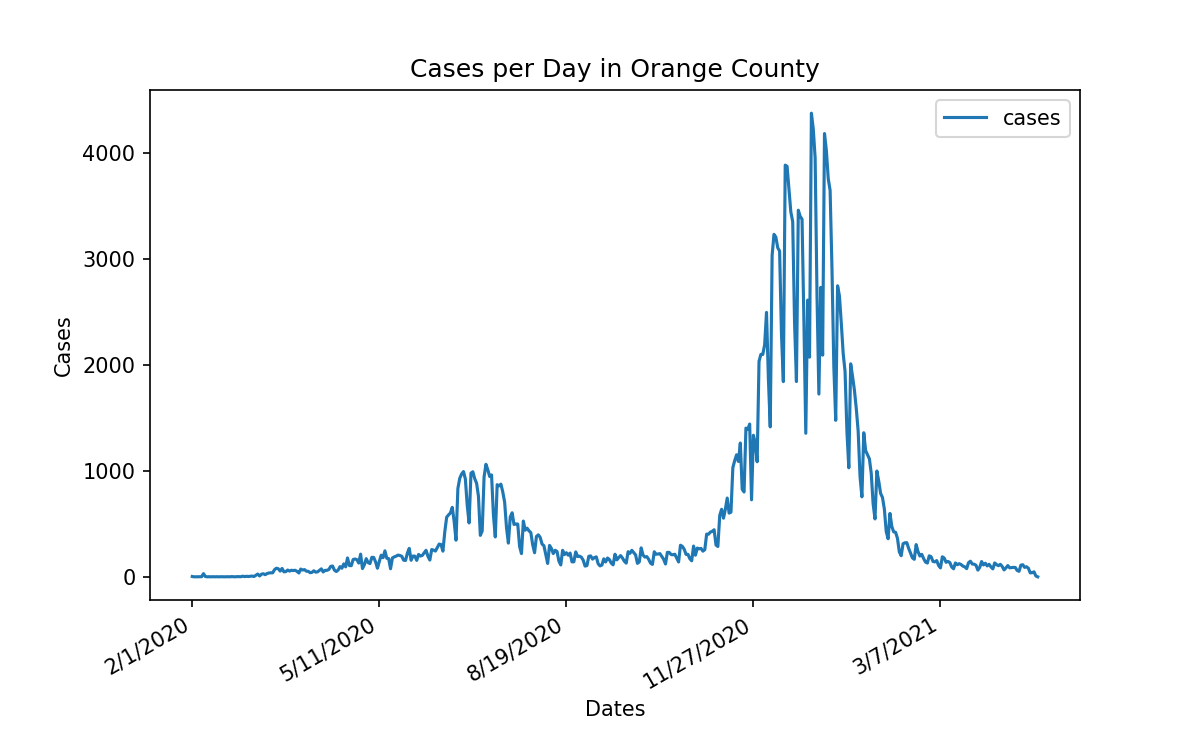

In [62]:
# 
cases_plot = ca_counties_cases_df.plot('date', 'cases',kind="line", figsize=(8,5))
plt.title(f"Cases per Day in {county2} County")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.gcf().autofmt_xdate()
plt.show()



<IPython.core.display.Javascript object>


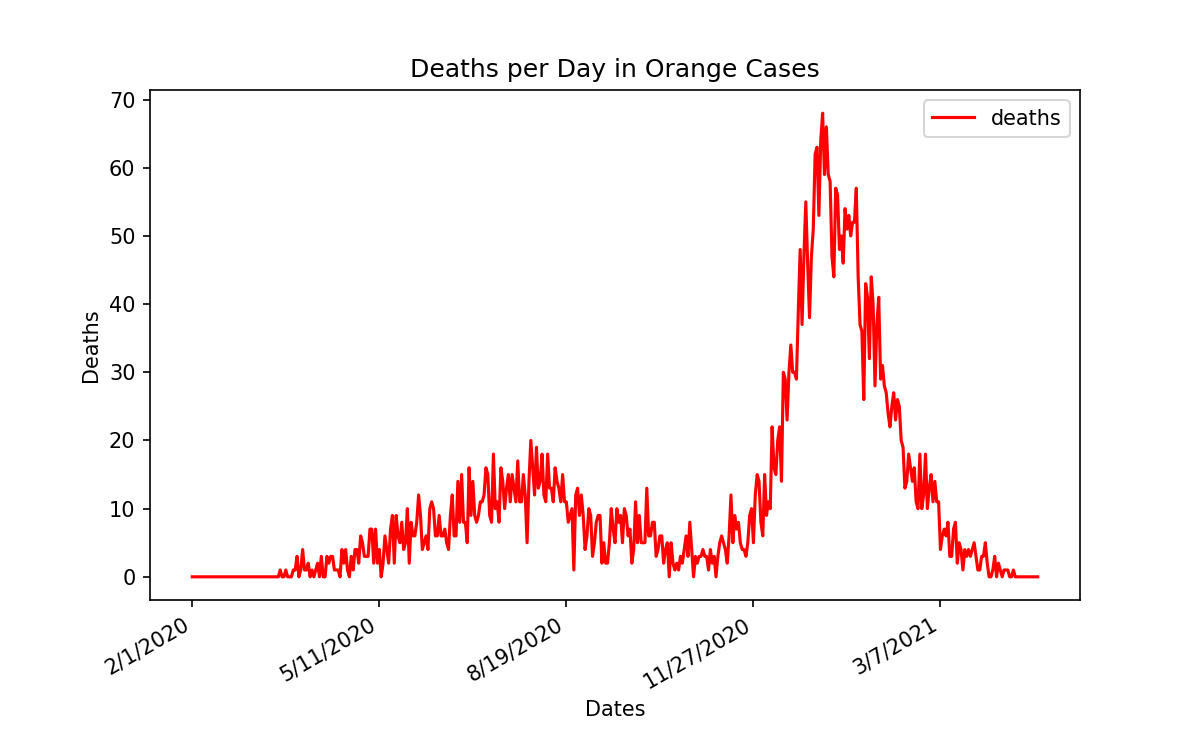

In [63]:
deaths_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line", color="red", figsize=(8,5))
plt.title(f"Deaths per Day in {county2} Cases")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


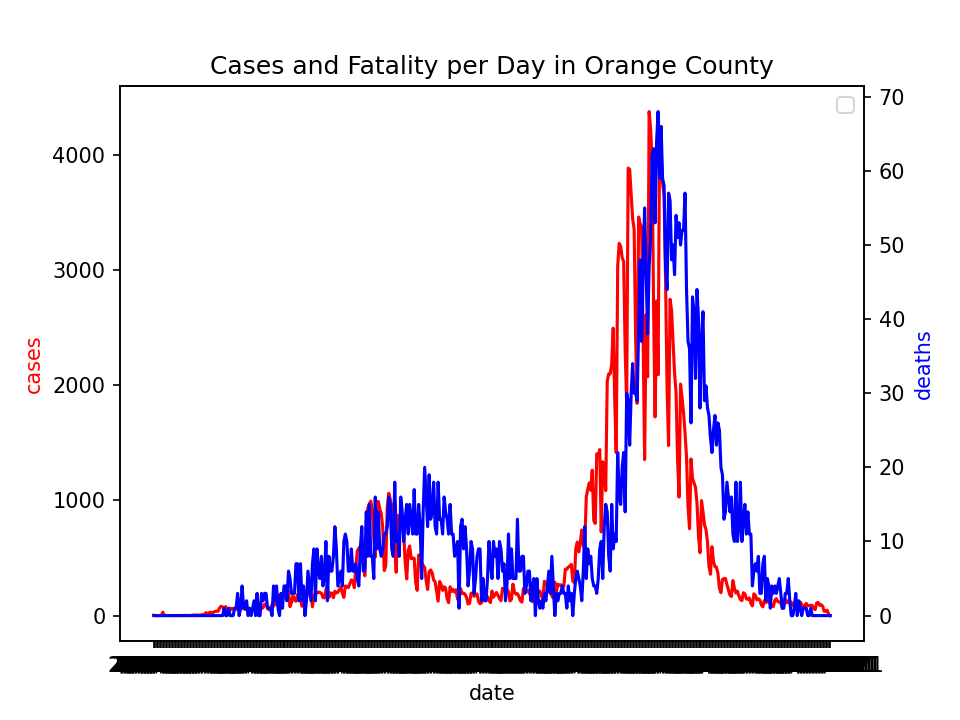

No handles with labels found to put in legend.


In [64]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_cases_df.date, ca_counties_cases_df["deaths"],color="blue")
ax2.set_ylabel("deaths",color="blue")



plt.title(f"Cases and Fatality per Day in {county2} County")
plt.legend()

plt.show()




<IPython.core.display.Javascript object>


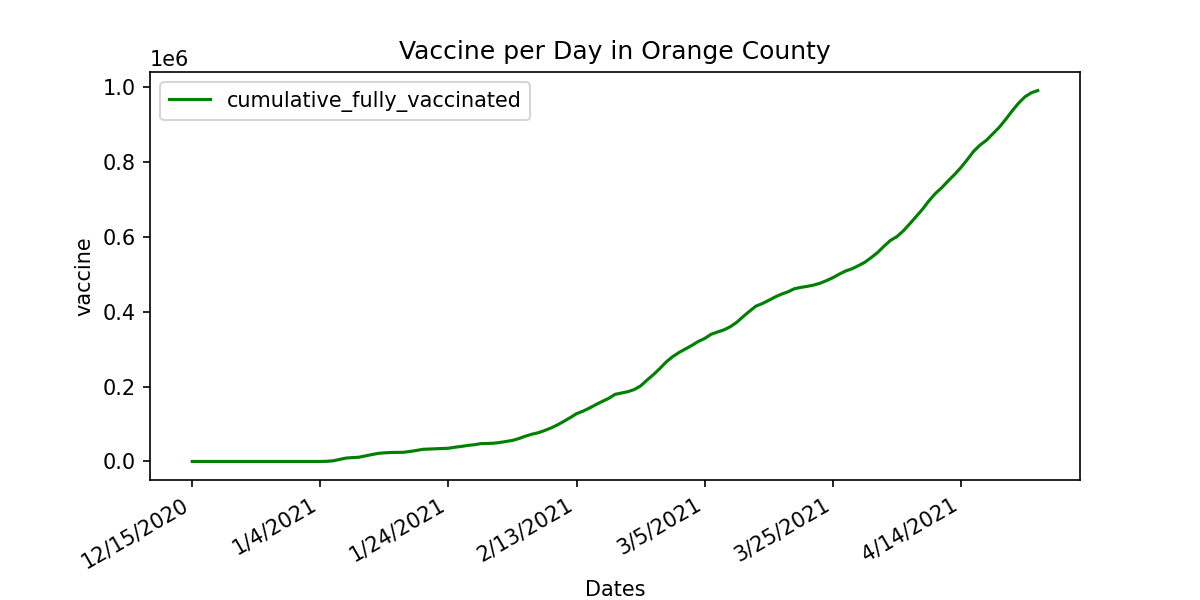

In [65]:

vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           'cumulative_fully_vaccinated',
                                           kind="line", color= "green", figsize=(8,4))
plt.title(f"Vaccine per Day in {county2} County")
plt.xlabel("Dates")
plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<IPython.core.display.Javascript object>


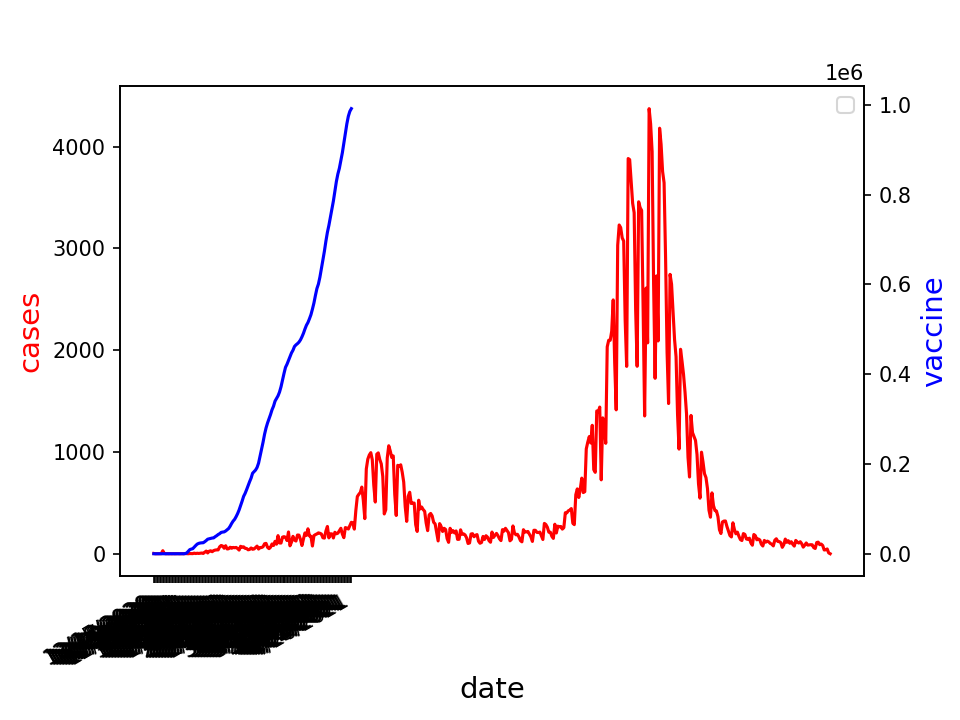

No handles with labels found to put in legend.


In [66]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_vaccine_df.administered_date, ca_counties_vaccine_df["cumulative_fully_vaccinated"],color="blue")
ax2.set_ylabel("vaccine",color="blue",fontsize=14)
plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()



<IPython.core.display.Javascript object>


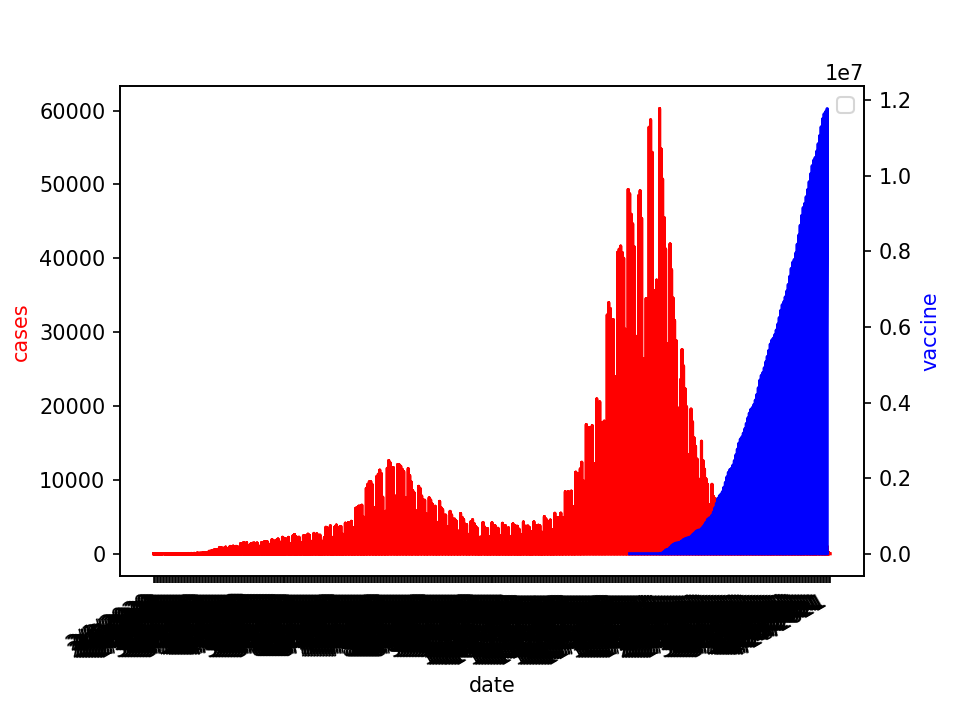

No handles with labels found to put in legend.


In [67]:
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merge_data.date, merge_data.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merge_data.date, merge_data["cumulative_fully_vaccinated"],color="blue")
ax2.set_ylabel("vaccine",color="blue")
plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<IPython.core.display.Javascript object>


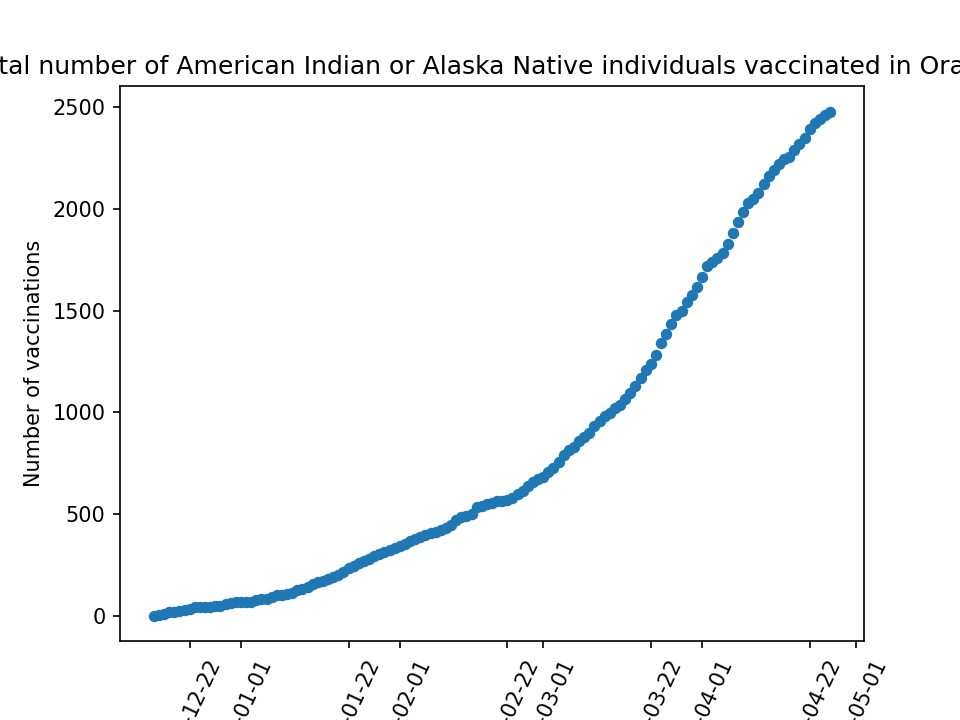

y = 18.71x + -436.73
The vaccination rate of the American Indian or Alaska Native demographic in Orange county is about 18.71089358402791 people per day
0.2708583321370572 percent of the American Indian or Alaska Native population is vaccinated per day


In [69]:
xaxis = np.arange (1.0, 134.0, 1)

demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of American Indian or Alaska Native individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")


x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)



print (line_eq)
print (f"The vaccination rate of the American Indian or Alaska Native demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the American Indian or Alaska Native population is vaccinated per day")

plt.show()


piea = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


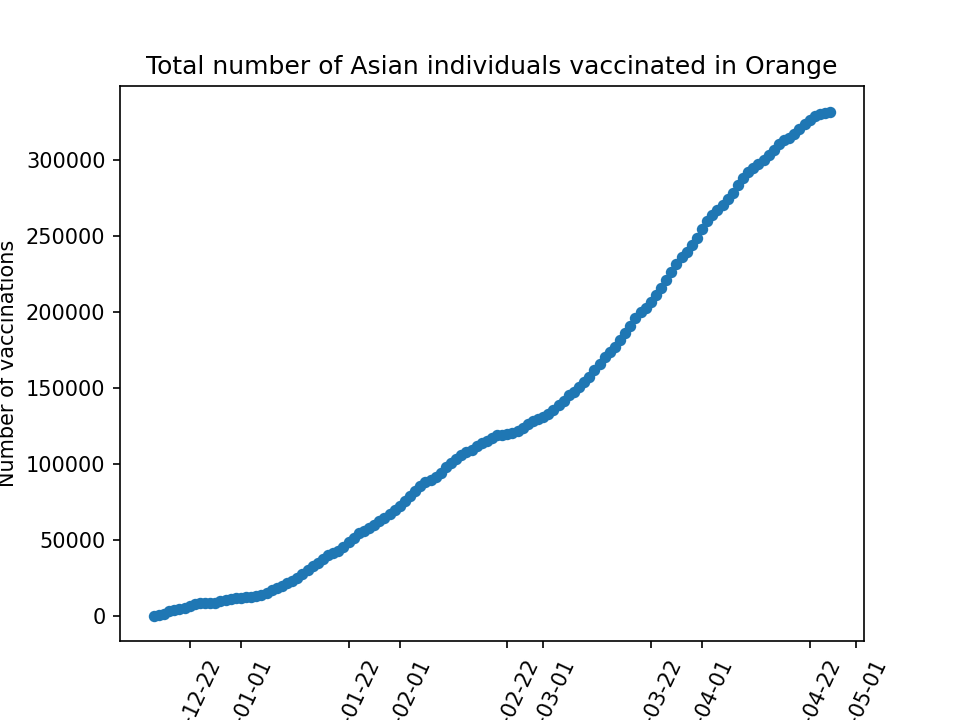

y = 2682.43x + -46759.3
The vaccination rate of the Asian demographic in Orange county is about 2682.426199487865 people per day
0.46017371276270763 percent of the Asian population is vaccinated per day


In [70]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Asian"]
xaxis = np.arange (1.0, 134.0, 1)

demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Asian individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Asian demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Asian population is vaccinated per day")

pieb = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


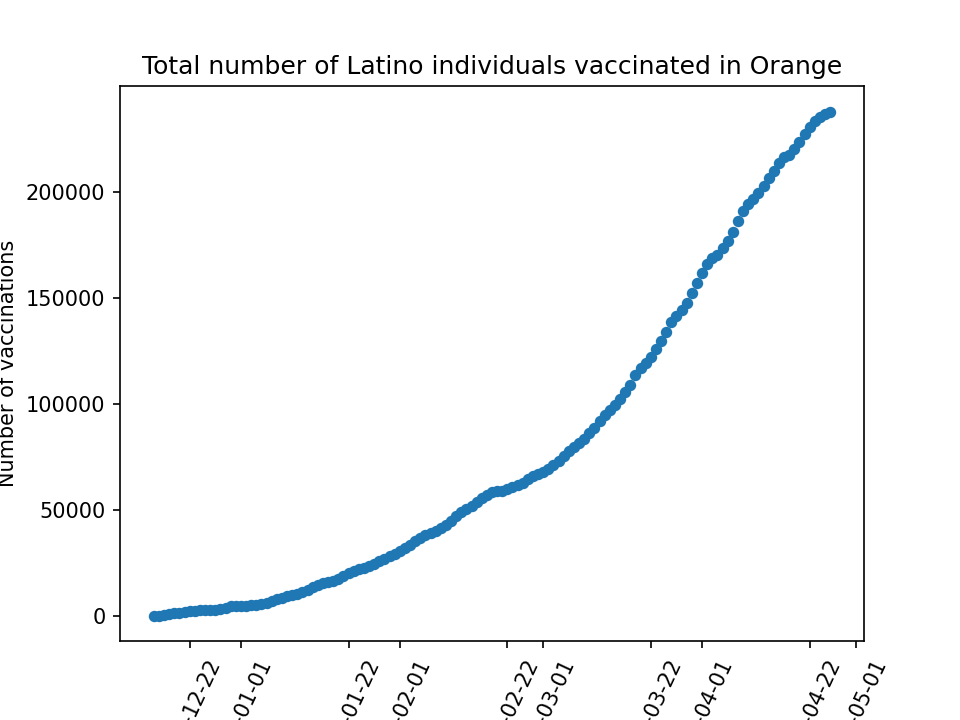

y = 1823.58x + -43487.29
The vaccination rate of the Latino demographic in Orange county is about 1823.5843696758857 people per day
0.15911395641656223 percent of the Latino population is vaccinated per day


In [71]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Latino"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Latino individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Latino demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Latino population is vaccinated per day")

pied = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


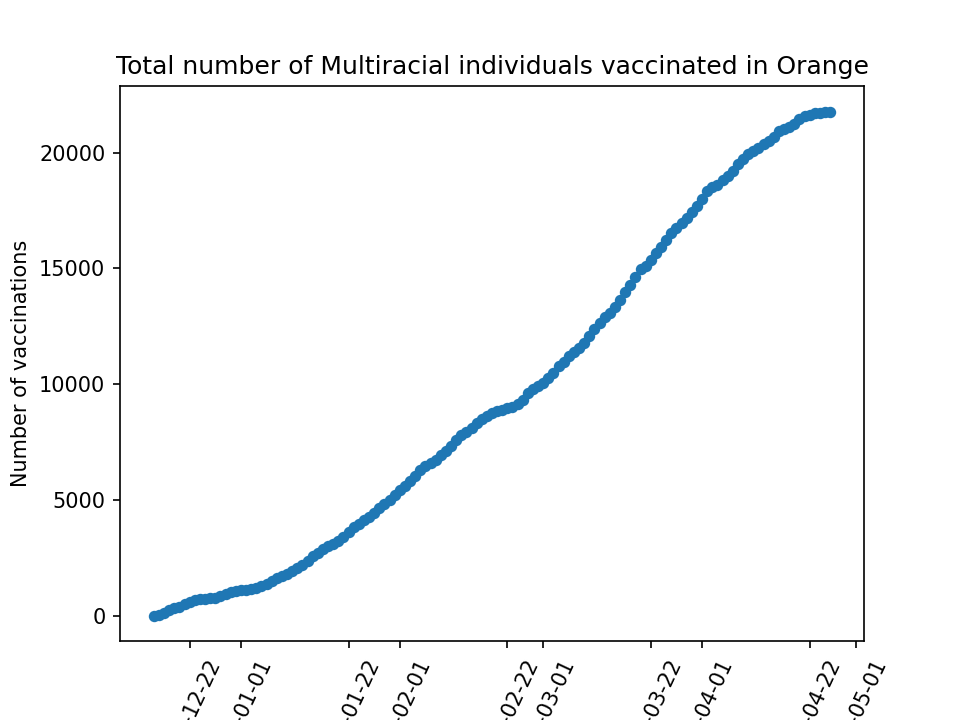

y = 183.36x + -2730.52
The vaccination rate of the Multiracial demographic in Orange county is about 183.36043806939327 people per day
0.2139461846231136 percent of the Multiracial population is vaccinated per day


In [72]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Multiracial"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Multiracial individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Multiracial demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Multiracial population is vaccinated per day")

piee = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


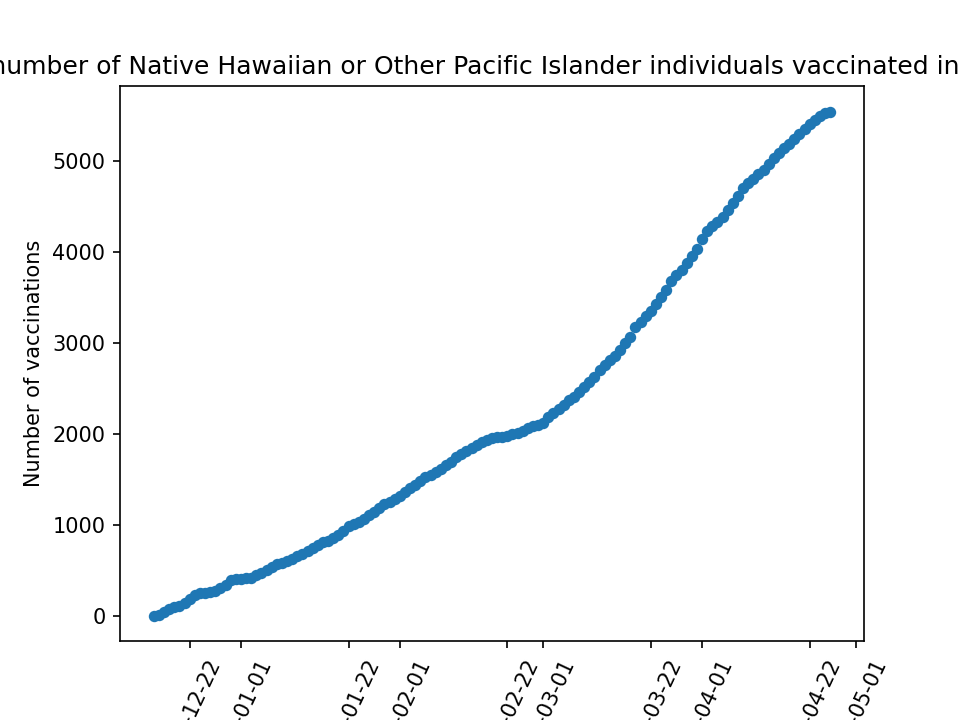

y = 42.2x + -586.37
The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in Orange county is about 42.19770763407842 people per day
0.45609281921831407 percent of the Native Hawaiian or Other Pacific Islander population is vaccinated per day


In [73]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Native Hawaiian or Other Pacific Islander"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Native Hawaiian or Other Pacific Islander individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Native Hawaiian or Other Pacific Islander population is vaccinated per day")

pief = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


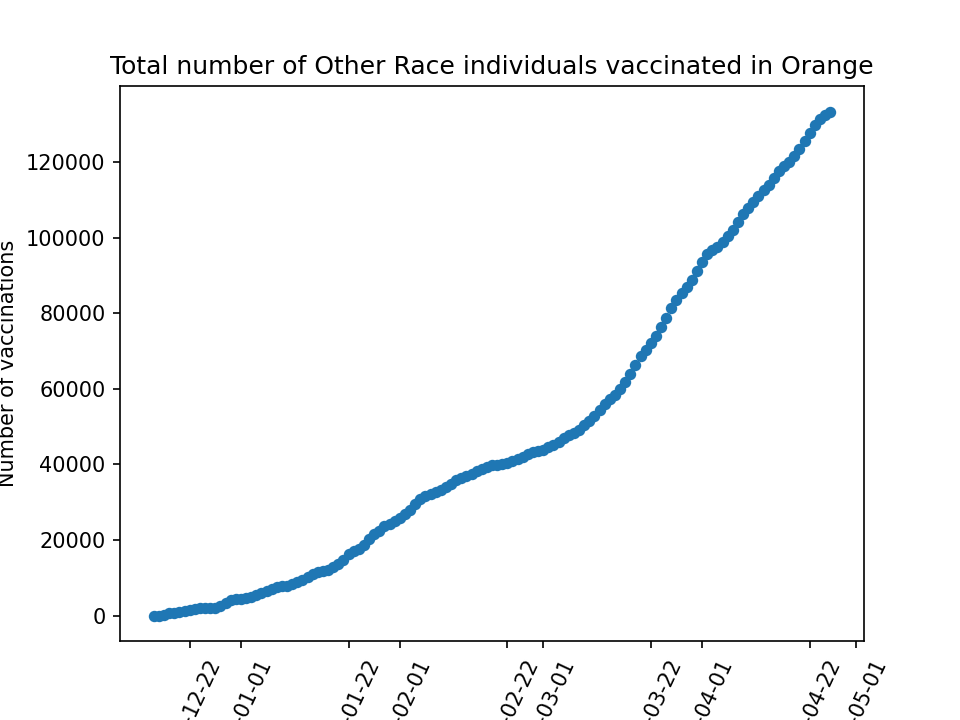

y = 1001.92x + -19412.12
The vaccination rate of the 'Other Race' demographic in Orange county is about 1001.917808428806 people per day
nan percent of the Other Race population is vaccinated per day


In [74]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Other Race"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Other Race individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the 'Other Race' demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Other Race population is vaccinated per day")

pieg = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


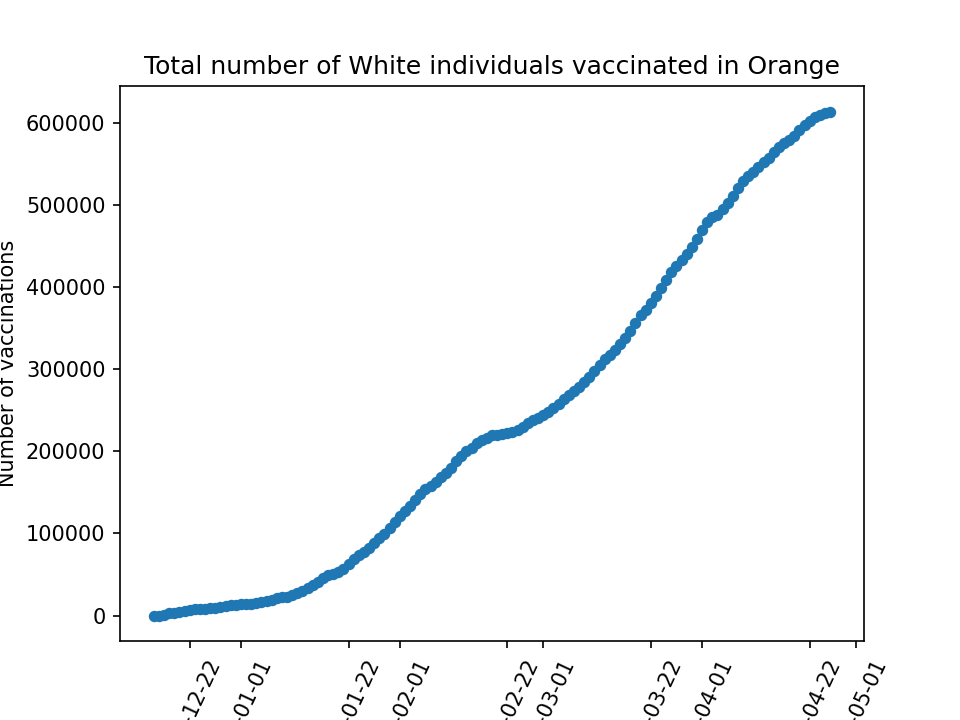

y = 5055.64x + -99378.71
The vaccination rate of the White demographic in Orange county is about 5055.643867130512 people per day
0.3804545658990951 percent of the White population is vaccinated per day


In [75]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "White"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of White individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the White demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the White population is vaccinated per day")

pieh = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


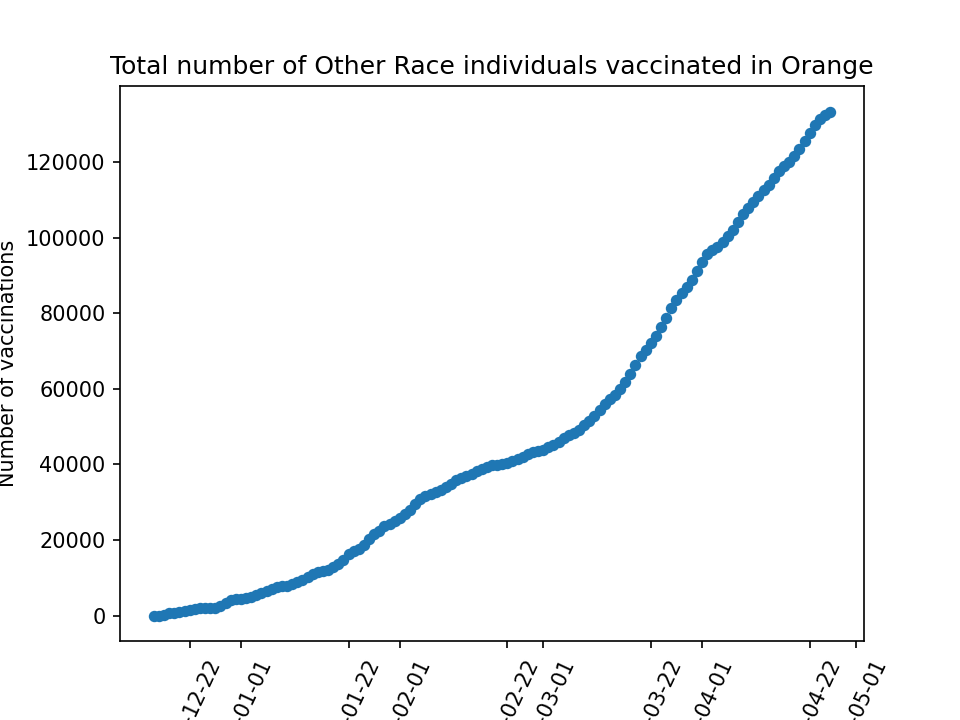

y = 1001.92x + -19412.12
The vaccination rate of the 'Other Race' demographic in Orange county is about 1001.917808428806 people per day


In [76]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Other Race"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Other Race individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)

print (line_eq)
print (f"The vaccination rate of the 'Other Race' demographic in {county2} county is about {slope} people per day")

<IPython.core.display.Javascript object>


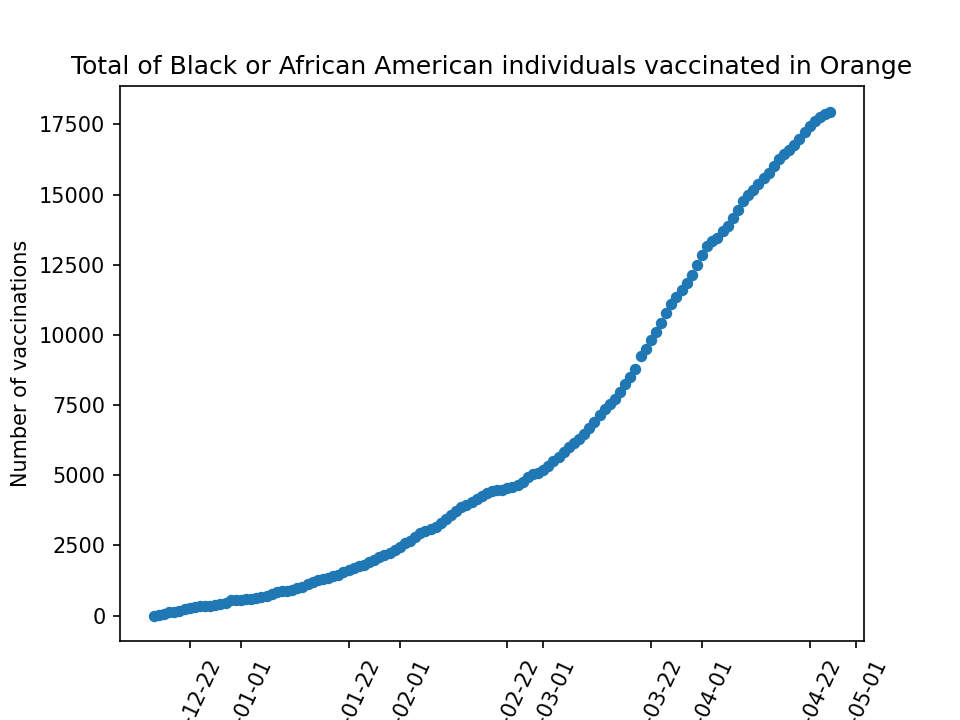

y = 139.43x + -3183.79
The vaccination rate of the Black or African American demographic in Orange county is about 139.42861733710123 people per day


In [77]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Black or African American"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total of Black or African American individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Black or African American demographic in {county2} county is about {slope} people per day")


<IPython.core.display.Javascript object>


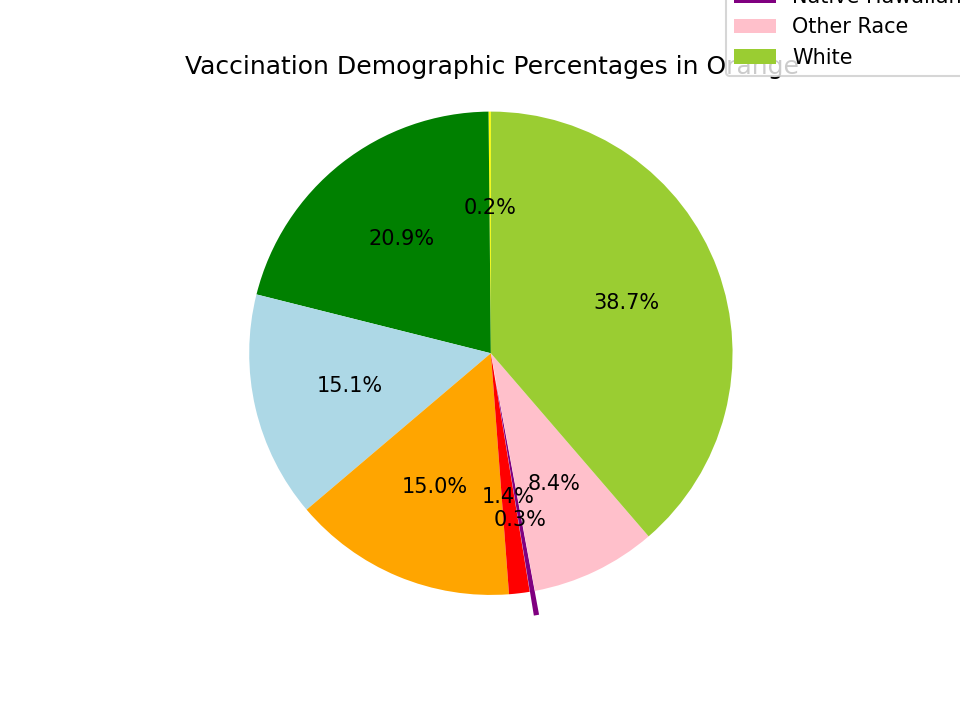

In [78]:
labels = ["American Indian or Alaska Native", "Asian", "Black or African American", "Latino", "Multiracial", "Native Hawaiian or Other Pacific Islander", "Other Race", "White"]
vaxnumbydemo = [piea, pieb, piec, pied, piee, pief, pieg, pieh]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,.1,0,0)
fig1, ax1 = plt.subplots()
patches, texts, auto = ax1.pie(vaxnumbydemo, colors=colors, shadow=False, startangle=90,explode=explode, autopct='%1.1f%%' )
plt.axis("equal")
plt.title(f"Vaccination Demographic Percentages in {county2}")

plt.legend(patches, labels, bbox_to_anchor=(.8, 1))

plt.show()